In [19]:
import seaborn as sb
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from termcolor import colored as cl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [10]:
card_data=pd.read_csv("C:/Users/91986/Downloads/archive.zip")

In [15]:
Total_transactions = len(card_data)
normal_transactions = len(card_data[card_data.Class == 0])
fraud_transactions = len(card_data[card_data.Class == 1])
percentage_fraud = round(fraud_transactions/normal_transactions*100, 2)
print(cl('Total Number of Transactions : {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions : {}'.format(normal_transactions), attrs = ['bold']))
print(cl('Number of Fraudulent Transactions : {}'.format(fraud_transactions), attrs = ['bold']))
print(cl('Percentage of Fraud Transactions : {}'.format(percentage_fraud), attrs = ['bold']))

Total Number of Transactions : 284807
Number of Normal Transactions : 284315
Number of Fraudulent Transactions : 492
Percentage of Fraud Transactions : 0.17


In [21]:
sc = StandardScaler()
amount = card_data['Amount'].values
card_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [23]:
card_data.drop_duplicates(inplace=True) #to remove duplicates

# Train 

In [24]:
X = card_data.drop('Class', axis = 1).values
Y = card_data['Class'].values

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [30]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_yhat = lr.predict(X_test)

C:\Users\91986\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9990131393447246


In [36]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(Y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6666666666666666


In [5]:
card_data=pd.read_csv("C:/Users/91986/Downloads/archive.zip")

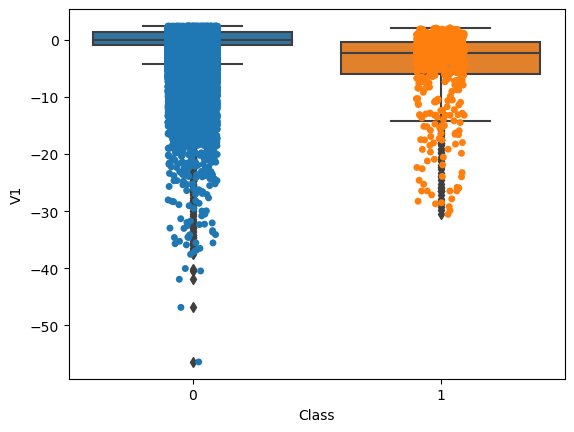

In [6]:
ax = sb.boxplot(x="Class", y="V1", data=card_data)
ax = sb.stripplot(x="Class", y="V1", data=card_data, jitter=True, edgecolor="gray")

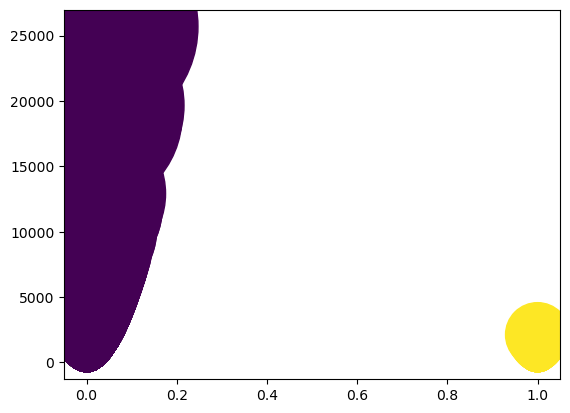

In [23]:
plt.scatter(card_data['Class'], card_data['Amount'], c=card_data["Class"],s=card_data['Amount'])
plt.show()

In [25]:
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750
